# Explore here

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


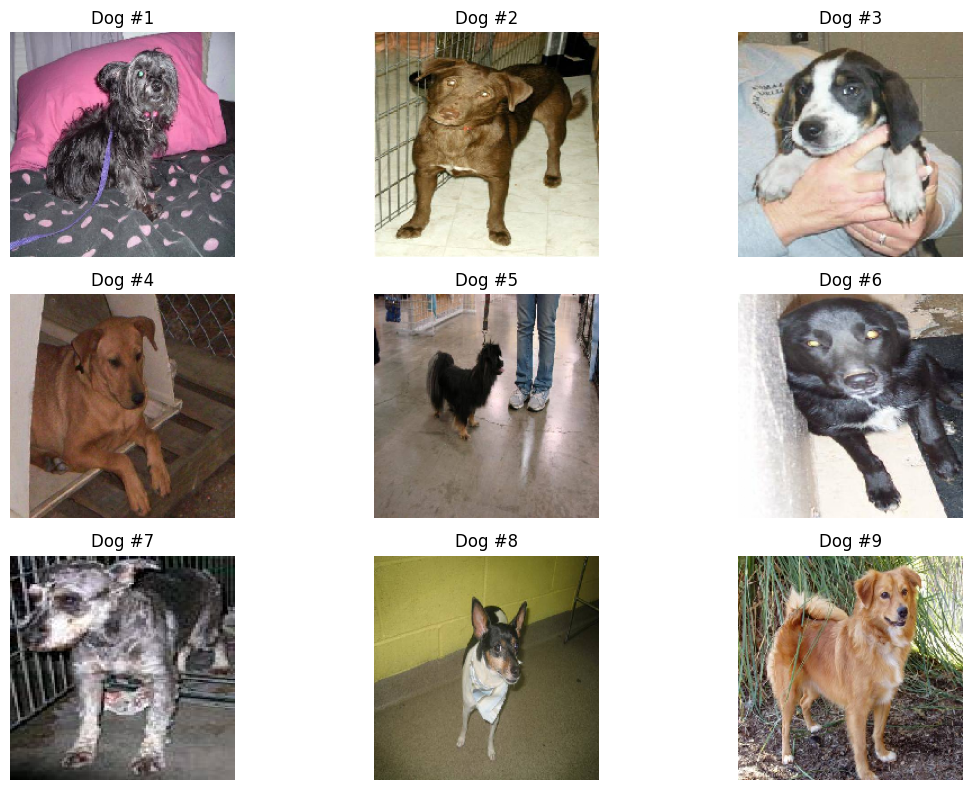

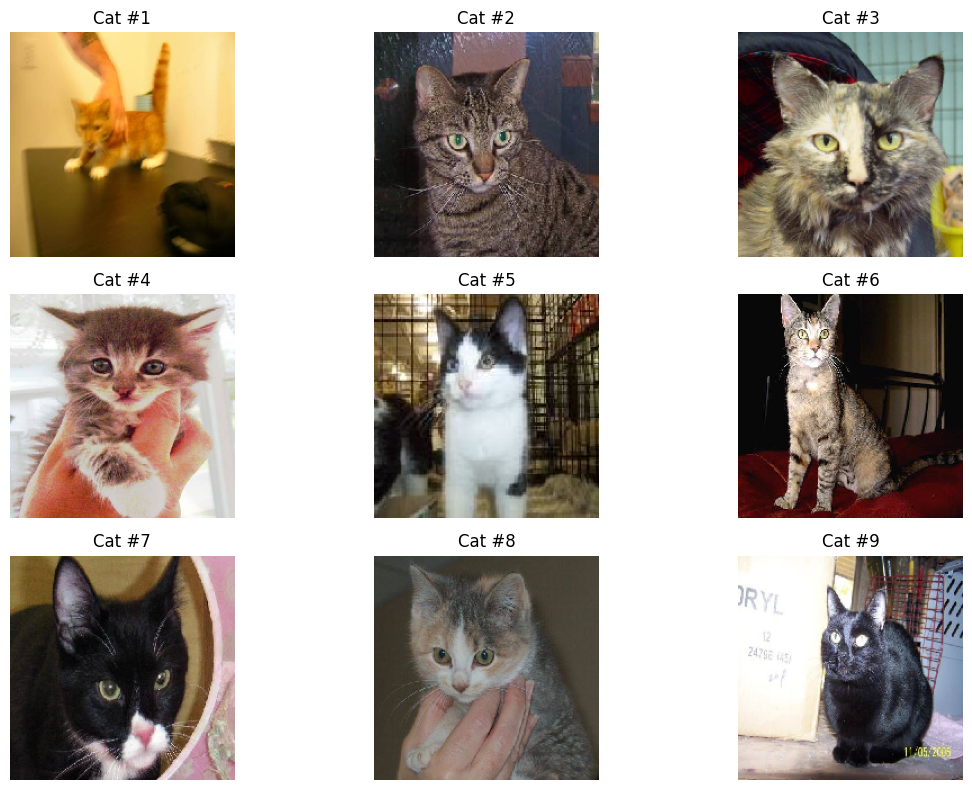

In [30]:

data_dir = "../data/raw/train"
dogs_path = "../data/raw/train/dogs"
cats_path = "../data/raw/train/cats"

dog_images_files = [f for f in os.listdir(dogs_path)]
cat_images_files = [f for f in os.listdir(cats_path)]

# Función para cargar imágenes
def load_images(image_files, folder_path, n=9, target_size=(200, 200)):
    images = []
    for i in range(n):
        img_path = os.path.join(folder_path, image_files[i])
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
    return images

dog_images = load_images(dog_images_files, dogs_path)
cat_images = load_images(cat_images_files, cats_path)

def show_images(images, title):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"{title} #{i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(dog_images, "Dog")
show_images(cat_images, "Cat")


In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% de las imágenes del directorio train se usarán para validación
)

train_dir = "../data/raw/train"

# Datos de entrenamiento (80%)
trdata = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Datos de validación (20%)
tsdata = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)




Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [49]:
model = Sequential()
model.add(Conv2D(input_shape=(200,200,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [50]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model

<Sequential name=sequential_2, built=True>

In [52]:
model.fit(trdata, epochs=1)

281/625 ━━━━━━━━━━━━━━━━━━━━ 20:37:45 216s/step - accuracy: 0.5041 - loss: 0.6941

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_2_1/conv2d_37_1/convolution/Conv2DBackpropFilter defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_2_1/conv2d_37_1/convolution/Conv2DBackpropFilter}}]] [Op:__inference_multi_step_on_iterator_7126]